<h1 style="color:Red",align="Center">War Sentiment Analysis</h1> 

In [23]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hp\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39hcbf5309_1         1.0 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    wordcloud-1.8.1            |   py39hb82d6ee_2         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py39hb82d6ee_2

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.12.0-py39haa95532_0 --> conda-forge::conda-4.13.0-py39hcbf5309_1




conda-4



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda




Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import plotly.express as px
from nltk.corpus import stopwords
import string

In [3]:
df=pd.read_excel(r"D:\DATA SCIENTIST & AI\DS-Job Projects\War Sentiment Analysis\War Sentiment Analysis.xlsx",sheet_name='Data')
df

user_id                                              tweet  \
0               3031528348  @merjaya I urge you to stop contributing into ...   
1      1225800000000000000  Russia to ban sunflower seed exports and impos...   
2      1394360000000000000  @nathaliejacoby1 On Russia-Trump Saga in 2016 ...   
3       982157000000000000  It turns out that people living on islands &am...   
4                199448306  Russia Attacks Ukraine - LIVE BREAKING NEWS CO...   
...                    ...                                                ...   
9996    958620000000000000  @nexta_tv Georgia has like 3 million populatio...   
9997             254156589  @kajakallas @BILD @JulianRoepcke It is noble, ...   
9998   1488340000000000000  @kellyesorelle @OrionMidas Yep. Just like I be...   
9999   1483450000000000000  Bueno y eso, nos responde sobre la interrogant...   
10000           2205295976  @JeanneWhalen @alyssafowers You kind of gloss ...   

      language  
0           en  
1           en  
2           en  
3           en  
4           en  
...        ...  
9996        en  
9997        en  
9998        en  
9999        es  
10000       en  

[10001 rows x 3 columns]

In [4]:
#view data set size
df.shape#view data set

(10001, 3)

In [5]:
### The column names of the dataset:
print(df.columns)

Index(['user_id', 'tweet', 'language'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   10001 non-null  int64 
 1   tweet     10001 non-null  object
 2   language  10001 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


###  Check Whether dataset contains any null values or not:

In [7]:
df.isnull().sum()
# none of the columns has null values

user_id     0
tweet       0
language    0
dtype: int64

In [8]:
## Check how many tweets are posted in English language:

df["language"].value_counts()

en     8483
it      477
pt      302
und     285
ru      148
es       57
in       42
fr       32
ca       30
de       28
ar       21
ja       13
pl       12
tr        9
nl        8
uk        6
tl        5
hi        5
cs        5
sv        5
ro        4
et        4
fi        3
zh        3
bg        2
no        2
cy        1
el        1
ur        1
da        1
lt        1
ko        1
sr        1
fa        1
pa        1
bn        1
Name: language, dtype: int64

### So it is Clear that most of the tweets are in English
#### Total Count of Tweet in English are: 8483

In [9]:
fig = px.scatter(df, x="language", y="user_id",size='user_id')
fig.show()

In [16]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creat wordcloud of the tweets, which will show the most frequently used words in the tweets :



In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

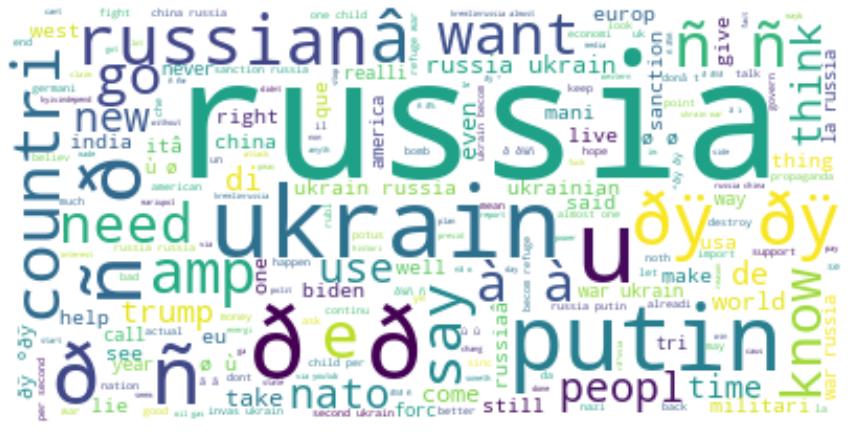

In [26]:

text = " ".join(i for i in df.tweet)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [34]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df = df[["tweet", "Positive", "Negative", "Neutral"]]
pd.DataFrame(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


tweet  Positive  Negative  \
0      merjaya urg stop contribut death innoc ukrain ...     0.144     0.314   
1      russia ban sunflow seed export impos quota sun...     0.000     0.340   
2       russiatrump saga  us elect one may say â€œlus...     0.000     0.040   
3      turn peopl live island amp arent white savag a...     0.000     0.000   
4      russia attack ukrain  live break news coverag ...     0.000     0.220   
...                                                  ...       ...       ...   
9996   nextatv georgia like  million popul  rusogeorg...     0.132     0.417   
9997   kajakalla bild julianroepck nobl know aint doa...     0.098     0.082   
9998   kellyesorell orionmida yep like believ georg p...     0.296     0.086   
9999   bueno eso nos respond sobr la interrogant  â¿e...     0.000     0.000   
10000  jeannewhalen alyssafow kind gloss artifici mea...     0.195     0.123   

       Neutral  
0        0.541  
1        0.660  
2        0.960  
3        1.000  
4        0.780  
...        ...  
9996     0.450  
9997     0.820  
9998     0.617  
9999     1.000  
10000    0.683  

[10001 rows x 4 columns]

In [37]:
df.to_excel(r"C:\Users\hp\Desktop\War Sentiment Analysis.xlsx")

### Check the most frequent words used by people with positive sentiments:

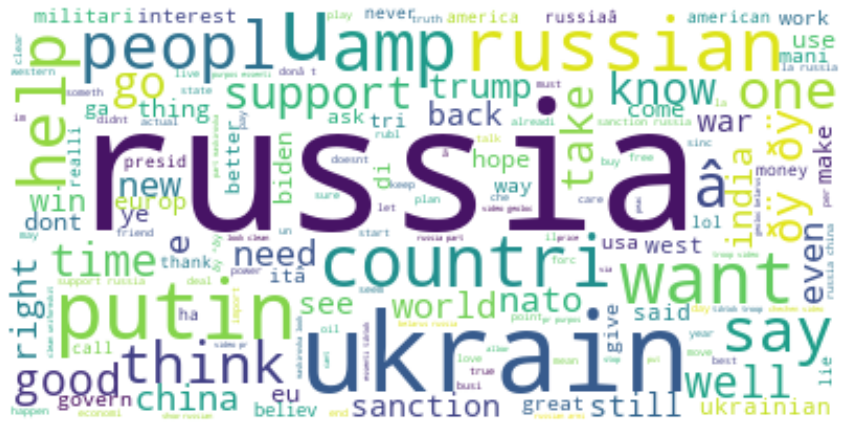

In [30]:

positive =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

### Check most frequent words used by people with negative sentiments:



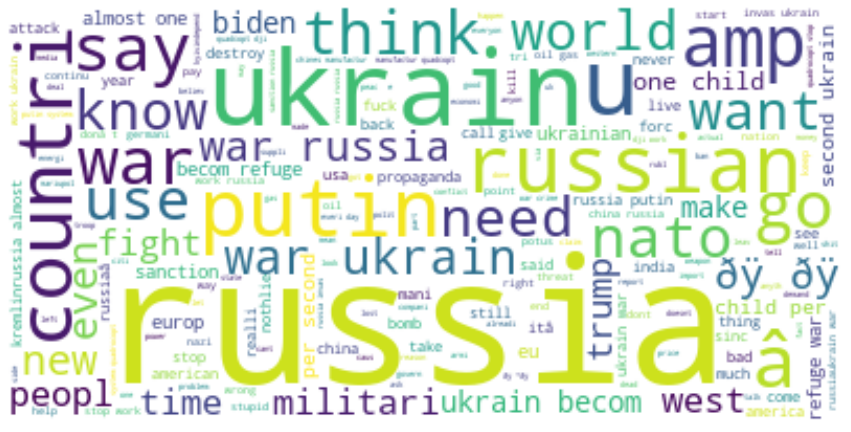

In [32]:
negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)

plt.figure( figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

<h1 style="color:Red",align="Center">THE END</h1> 